# Import Libraries

In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
from plotly import tools
import plotly.express as px
import plotly.figure_factory as ff

import plotly.graph_objects as go
from plotly.graph_objs import Pie, Layout,Figure
import plotly.offline as pyo
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
#To print multiple outputs together
from __future__ import print_function

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Change column display number during print
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth',None)

import warnings
warnings.filterwarnings("ignore")

# Loading datasets

In [4]:
cust_df = pd.read_excel('../data/Customer_Data.xlsx')

In [5]:
inv_df = pd.read_csv('../data/Final_invoice.csv')

In [6]:
jtd_df = pd.read_csv('../data/JTD.csv')

In [7]:
plant_df = pd.read_excel('../data/PlantMaster.xlsx')

In [8]:
cust_df.info()
cust_df.shape
cust_df.isnull().sum()

inv_df.info()
inv_df.shape
inv_df.isnull().sum()

jtd_df.info()
jtd_df.shape
jtd_df.isnull().sum()

plant_df.info()
plant_df.shape
plant_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555338 entries, 0 to 555337
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Business Partner  555338 non-null  object        
 1   Customer No.      555338 non-null  object        
 2   Partner Type      555260 non-null  float64       
 3   Data Origin       555202 non-null  object        
 4   Title             509031 non-null  float64       
 5   Marital Status    16037 non-null   float64       
 6   Occupation        14558 non-null   float64       
 7   Date of Birth     13444 non-null   object        
 8   Death date        663 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 38.1+ MB


(555338, 9)

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492314 entries, 0 to 492313
Data columns (total 59 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            492314 non-null  int64  
 1   Amt Rcvd From Custom  295028 non-null  float64
 2   Amt Rcvd From Ins Co  295028 non-null  float64
 3   Area / Locality       468424 non-null  object 
 4   CGST(14%)             295028 non-null  float64
 5   CGST(2.5%)            295028 non-null  float64
 6   CGST(6%)              295028 non-null  float64
 7   CGST(9%)              295028 non-null  float64
 8   CITY                  492313 non-null  object 
 9   Cash /Cashless Type   27420 non-null   object 
 10  Claim No.             4804 non-null    object 
 11  Cust Type             492314 non-null  object 
 12  Customer No.          492314 non-null  object 
 13  District              492314 non-null  object 
 14  Expiry Date           22231 non-null   object 
 15  

(492314, 59)

Unnamed: 0                   0
Amt Rcvd From Custom    197286
Amt Rcvd From Ins Co    197286
Area / Locality          23890
CGST(14%)               197286
CGST(2.5%)              197286
CGST(6%)                197286
CGST(9%)                197286
CITY                         1
Cash /Cashless Type     464894
Claim No.               487510
Cust Type                    0
Customer No.                 0
District                     0
Expiry Date             470083
Gate Pass Date          451399
Gate Pass Time               0
IGST(12%)               197286
IGST(18%)               197286
IGST(28%)               197286
IGST(5%)                197286
Insurance Company       468723
Invoice Date                 0
Invoice No                   0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619484 entries, 0 to 5619483
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   DBM Order            int64  
 2   Order Item           int64  
 3   Material             object 
 4   Labor Value Number   object 
 5   Description          object 
 6   Item Category        object 
 7   Order Quantity       float64
 8   Target quantity UoM  object 
 9   Net value            float64
dtypes: float64(2), int64(3), object(5)
memory usage: 428.7+ MB


(5619484, 10)

Unnamed: 0                   0
DBM Order                    0
Order Item                   0
Material                 51629
Labor Value Number     3774033
Description              51629
Item Category                0
Order Quantity               0
Target quantity UoM      51629
Net value                    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plant                    438 non-null    object 
 1   Name 1                   438 non-null    object 
 2   Valuation Area           438 non-null    object 
 3   Customer no. - plant     438 non-null    object 
 4   Vendor number plant      2 non-null      object 
 5   Factory calendar         438 non-null    object 
 6   Name 2                   436 non-null    object 
 7   House number and street  436 non-null    object 
 8   PO Box                   437 non-null    float64
 9   Postal Code              438 non-null    int64  
 10  City                     438 non-null    object 
 11  Sales organization       433 non-null    object 
 12  State                    438 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 44.6+ KB


(438, 13)

Plant                        0
Name 1                       0
Valuation Area               0
Customer no. - plant         0
Vendor number plant        436
Factory calendar             0
Name 2                       2
House number and street      2
PO Box                       1
Postal Code                  0
City                         0
Sales organization           5
State                        0
dtype: int64

# Exploratory Data Analysis

In [9]:
cust_df

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaT
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaT
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaT
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaT
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
555333,PLX506,PLX506,NaN,NaN,NaN,NaN,NaN,NaN,NaT
555334,PLX507,PLX507,NaN,NaN,NaN,NaN,NaN,NaN,NaT
555335,PLX508,PLX508,NaN,NaN,NaN,NaN,NaN,NaN,NaT
555336,PLX555,PLX555,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [10]:
inv_df

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492309,984736,NaN,NaN,.,NaN,NaN,NaN,NaN,Chennai,NaN,NaN,Retail,203820,Tamil Nadu,NaN,NaN,00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-30,7231000017,14:56:58,400100,2016-06-30,09:15:12,72546,2495.90,MARUTI SUZUKI,374.97,ALTO,NaN,0.00,Paid Service,NaN,1587.28,600058,X405,X405 - NANGAN MOTORS PVT. LTD.,NaN,NO,0.0,TN38Y9343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4458.15,NaN,NaN,NaN,NaN,NaN,X405SA1
492310,984737,NaN,NaN,.,NaN,NaN,NaN,NaN,ADAMBAKKAM,NaN,NaN,Retail,170411,Tamil Nadu,NaN,NaN,00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-30,7231000018,15:06:52,400092,2016-06-30,08:42:15,18968,2443.47,NISSAN,0.00,MICRA,NaN,0.00,Paid Service,NaN,4388.61,600088,X405,X405 - NANGAN MOTORS PVT. LTD.,NaN,NO,0.0,TN22CK0396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6832.08,NaN,NaN,NaN,NaN,NaN,X405SA1
492311,984738,NaN,NaN,CHENNAI,NaN,NaN,NaN,NaN,CHENNAI,NaN,NaN,Retail,48811,Tamil Nadu,NaN,NaN,00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-30,7231000019,15:43:56,400082,2016-06-30,08:27:51,177433,2598.92,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,NaN,0.00,Paid Service,NaN,6588.79,600044,X405,X405 - NANGAN MOTORS PVT. LTD.,NaN,NO,0.0,TN07BA0211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9187.71,NaN,NaN,NaN,NaN,NaN,X405SA1
492312,984739,NaN,NaN,"DK NAGAR EXTN,",NaN,NaN,NaN,NaN,"Vijaya Nagar, 1 main road,Ve

In [12]:
jtd_df

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63
...,...,...,...,...,...,...,...,...,...,...
5619479,5619479,962813,50,ACCT_SRV,ACCDBP0121,DENTING RADIATOR MOUNTING PANEL LOWER,P001,850.0,MIN,1050.00
5619480,5619480,962813,60,ACCT_SRV,ACCDBP0110,DENTING QUARTER PANEL RHS,P001,750.0,MIN,1250.00
5619481,5619481,962813,70,TOYOTA_SRV,TOINEL0029,CHARGING BATTERY & TESTING LOAD,P001,42.0,MIN,223.00
5619482,5619482,962813,80,ACCT_SRV,ACCDEL0093,REPAIR LHS / RHS TAIL LIGHT BOX,P001,450.0,MIN,450.00


In [13]:
plant_df

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka
5,X005,X005 - KLN MOTORS,X005,PLX005,NaN,IN,Chennai,"No.8 (NP) Developed Plot,",600032.0,600032,Chennai,MFCB,Tamil Nadu
6,X006,X006 - A.M.MOTORS,X006,PLX006,NaN,IN,Mumbai,"8, Mira, Behind Ajit Palace Ho",401104.0,401104,Thane,MFCB,Maharashtra
7,X007,X007 - OM SRI SATYA SAI AUTOMO,X007,PLX007,NaN,IN,Bengaluru,"Seegehalli main road,",560037.0,560037,Bengaluru,MFCB,Karnataka
8,X008,X008- AAKASH AUTO (Puducherry),X008,PLX008,NaN,IN,Puducherry,"145/2, Villiyanur main road,",605110.0,605110,Puducherry,MFCC,Puducherry
9,X010,X010 - LVM MOTORS,X010,PLX010,NaN,IN,Chennai,"B- 49 Emerald Nagar, SIPCOT,",632406.0,632406,Ranipet,MFCD,Tamil Nadu


In [14]:
cust_df.isnull().sum()

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

<AxesSubplot:>

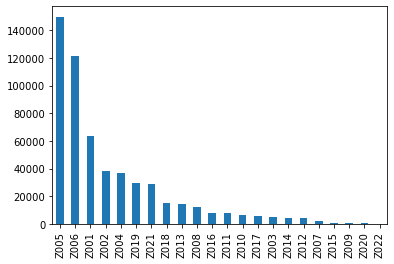

In [42]:
cust_df["Data Origin"].value_counts().plot(kind='bar')

In [46]:
cust_df["Partner Type"].value_counts()

1.0       554967
2.0           68
3.0           62
9001.0        57
9003.0        56
4.0           48
9002.0         2
Name: Partner Type, dtype: int64

<AxesSubplot:ylabel='Title'>

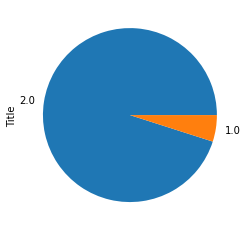

In [85]:
cust_df["Title"].value_counts().plot(kind='pie')

In [51]:
cust_df["Marital Status"].value_counts()

2.0    14045
1.0     1939
5.0       21
3.0       19
4.0       13
Name: Marital Status, dtype: int64

<AxesSubplot:>

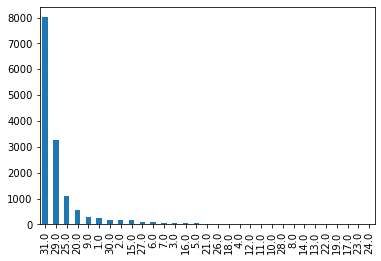

In [52]:
cust_df["Occupation"].value_counts().plot(kind='bar')

In [21]:
inv_df.isnull().sum()

Unnamed: 0                   0
Amt Rcvd From Custom    197286
Amt Rcvd From Ins Co    197286
Area / Locality          23890
CGST(14%)               197286
CGST(2.5%)              197286
CGST(6%)                197286
CGST(9%)                197286
CITY                         1
Cash /Cashless Type     464894
Claim No.               487510
Cust Type                    0
Customer No.                 0
District                     0
Expiry Date             470083
Gate Pass Date          451399
Gate Pass Time               0
IGST(12%)               197286
IGST(18%)               197286
IGST(28%)               197286
IGST(5%)                197286
Insurance Company       468723
Invoice Date                 0
Invoice No                   0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model   

<AxesSubplot:>

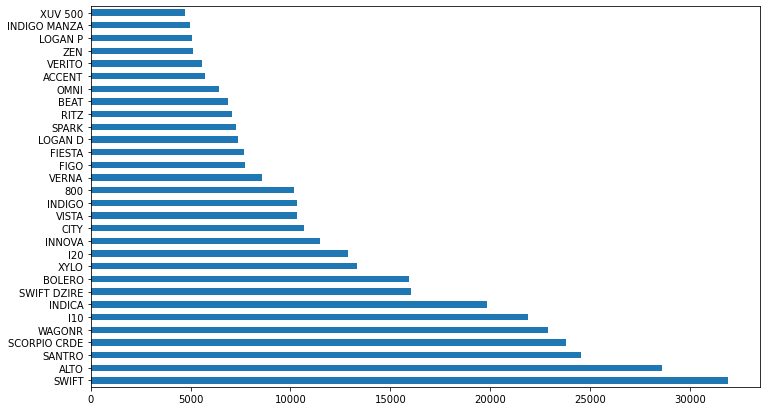

In [89]:
inv_df["Model"].value_counts()[:30].plot(kind='barh',figsize=(12,7))

<AxesSubplot:>

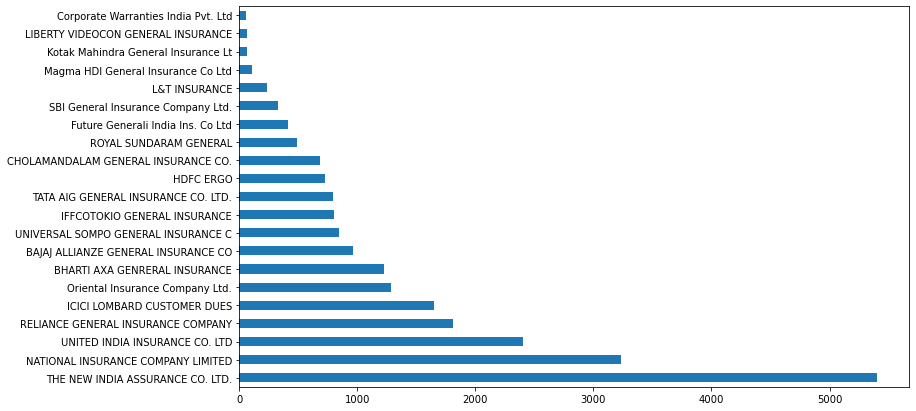

In [87]:
inv_df["Insurance Company"].value_counts().plot(kind='barh', figsize = (12,7))

<AxesSubplot:>

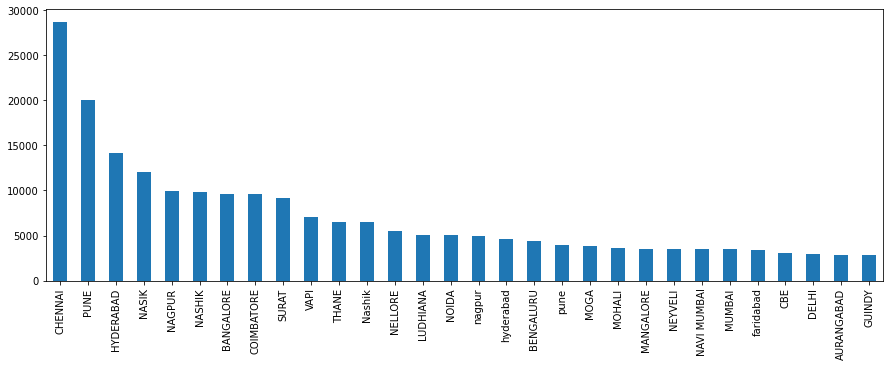

In [97]:
inv_df["CITY"].value_counts()[:30].plot(kind='bar', figsize=(15,5))

<AxesSubplot:>

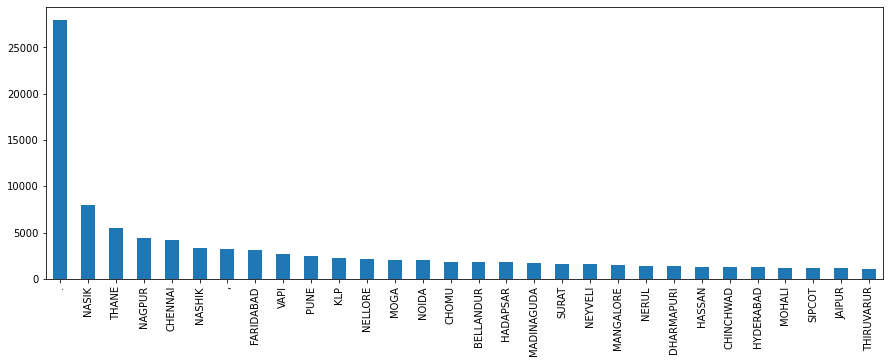

In [96]:
inv_df["Area / Locality"].value_counts()[:30].plot(kind='bar', figsize=(15,5))

<AxesSubplot:ylabel='Cash /Cashless Type'>

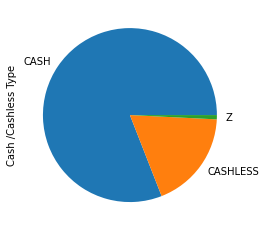

In [84]:
inv_df["Cash /Cashless Type"].value_counts().plot(kind='pie')

<AxesSubplot:>

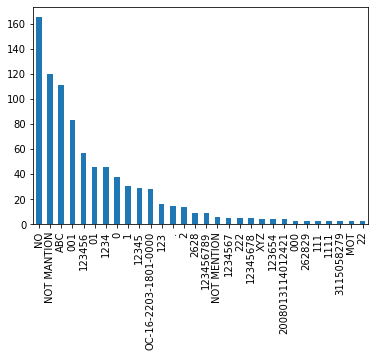

In [83]:
inv_df["Claim No."].value_counts()[:30].plot(kind='bar')

In [28]:
jtd_df.isnull().sum()

Unnamed: 0                   0
DBM Order                    0
Order Item                   0
Material                 51629
Labor Value Number     3774033
Description              51629
Item Category                0
Order Quantity               0
Target quantity UoM      51629
Net value                    0
dtype: int64

<AxesSubplot:>

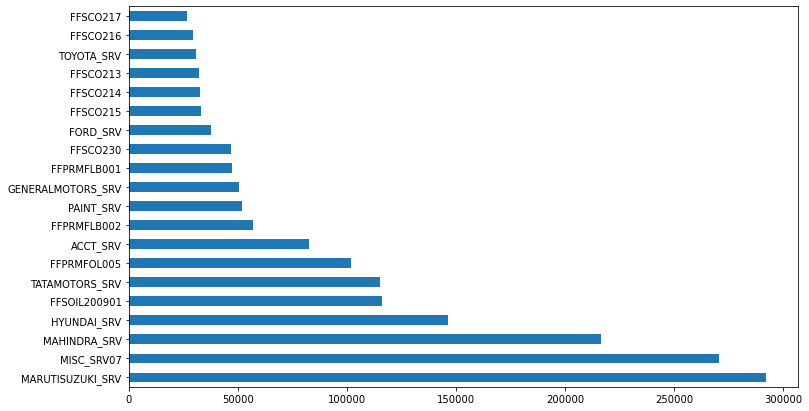

In [91]:
jtd_df["Material"].value_counts()[:20].plot(kind='barh', figsize=(12,7))

<AxesSubplot:ylabel='Item Category'>

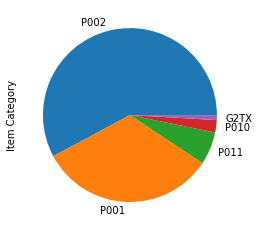

In [93]:
jtd_df["Item Category"].value_counts().plot(kind='pie')

<AxesSubplot:>

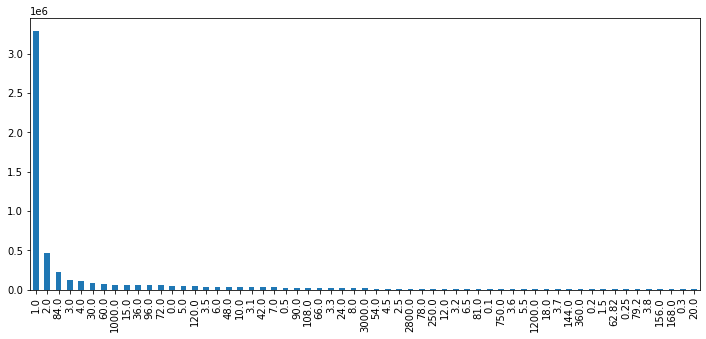

In [95]:
jtd_df["Order Quantity"].value_counts()[:20].plot(kind='bar', figsize=(12,5))

<AxesSubplot:ylabel='Target quantity UoM'>

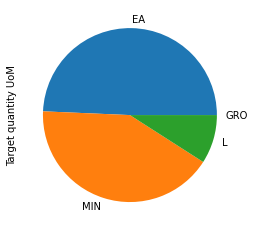

In [98]:
jtd_df["Target quantity UoM"].value_counts().plot(kind='pie')

<AxesSubplot:>

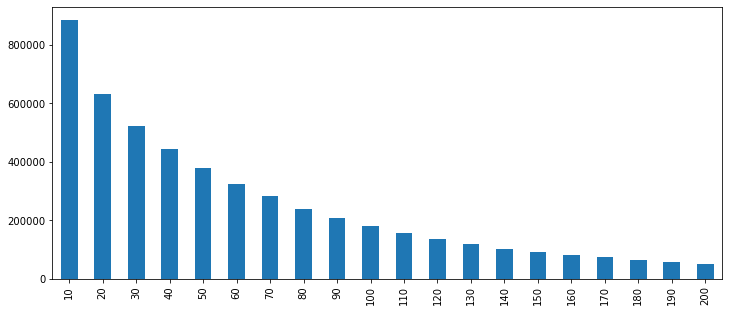

In [99]:
jtd_df["Order Item"].value_counts()[:20].plot(kind='bar', figsize=(12,5))

<AxesSubplot:>

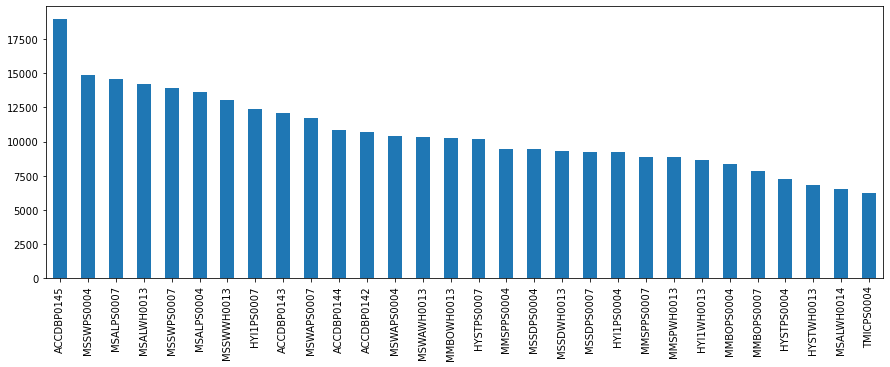

In [102]:
jtd_df["Labor Value Number"].value_counts()[:30].plot(kind='bar', figsize=(15,5))

In [34]:
plant_df.isnull().sum()

Plant                        0
Name 1                       0
Valuation Area               0
Customer no. - plant         0
Vendor number plant        436
Factory calendar             0
Name 2                       2
House number and street      2
PO Box                       1
Postal Code                  0
City                         0
Sales organization           5
State                        0
dtype: int64

In [35]:
plant_df["Name 1"].value_counts()

X018 - EXPRESS WHEELS AUTO SER    1
X159 - BHANDARI SERVICE CENTRE    1
X402 - EMRP AUTOMOBILES           1
X114 - A J MOTORWORKS             1
X308 - SHRI RAM CAR SERVICES      1
X523 - RS MOTORS                  1
X271 - SHYAMDEB AUTOMOBILES       1
X050 - VISHWATMAK AUTOMOBILES     1
X714 - M/S SRI GURURAGHAVENDRA    1
X405 - NANGAN MOTORS PVT. LTD.    1
X107 - DIXIT MOTORS               1
X110 - KALYAN SERVICES            1
X705 - M/S SLV CAR CARE           1
X125 - SHRI WARDHMAN MOTO CORP    1
X122 - S & B AUTOMOBILE           1
X366 -  R S AUTOMOBILES           1
X403 - S V MOTORS                 1
X016 - KHUTWAD MOTORS             1
X289 - A.S.UNIVERSAL PVT. LTD.    1
X443 - ADVANCE AUTO CARE          1
X357 - RAJ AUTOMOBILES            1
X214 - M/S J.P. AUTOMOBILES       1
X061 - APS MOTORCARE PVT LTD      1
X419 - SHIV MOTORS                1
X588 - DEGH INFRATECH CONTRACT    1
X537 - KOMMA AUTO GARAGE          1
X310 -  RAM KRISHNA MOTOCORP      1
X450 - AMBICA CAR CARE      

In [36]:
plant_df["Customer no. - plant"].value_counts()

PLX031    1
PLX366    1
PLX082    1
PLX265    1
PLX203    1
PLX259    1
PLX135    1
PLX154    1
PLX374    1
PLX389    1
PLX594    1
PLX002    1
PLX253    1
PLX421    1
PLX418    1
PLX247    1
PLX046    1
PLX205    1
PLX539    1
PLX024    1
PLX413    1
PLX285    1
PLX728    1
PLX147    1
PLX192    1
PLX411    1
PLX758    1
PLX042    1
PLX504    1
PLX367    1
PLX576    1
PLX417    1
PLX240    1
PLX079    1
PLX226    1
PLX545    1
PLX312    1
PLX689    1
PLX266    1
PLX795    1
PLX359    1
PLX201    1
PLX306    1
PLX243    1
PLX416    1
PLX789    1
PLX110    1
PLX604    1
PLX419    1
PLX086    1
PLX156    1
PLX529    1
PLX481    1
PLX209    1
PLX050    1
PLX586    1
PLX498    1
PLX289    1
PLX128    1
PLX475    1
PLX146    1
PLX720    1
PLX270    1
PLX140    1
PLX033    1
PLX401    1
PLX150    1
PLX037    1
PLX621    1
PLX569    1
PLX011    1
PLX006    1
PLX017    1
PLX709    1
PLX639    1
PLX172    1
PLX527    1
PLX023    1
PLX231    1
PLX445    1
PLX400    1
PLX457    1
PLX014    1
PLX3

<AxesSubplot:>

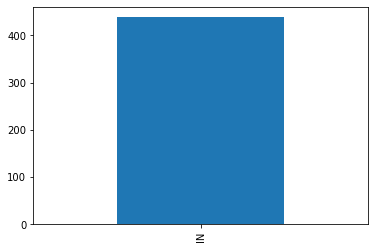

In [103]:
plant_df["Factory calendar"].value_counts().plot(kind='bar')

<AxesSubplot:>

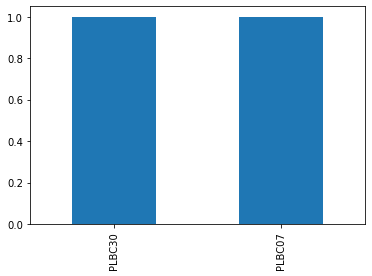

In [104]:
plant_df["Vendor number plant"].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Sales organization'>

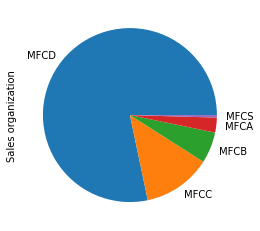

In [105]:
plant_df["Sales organization"].value_counts().plot(kind='pie')

<AxesSubplot:>

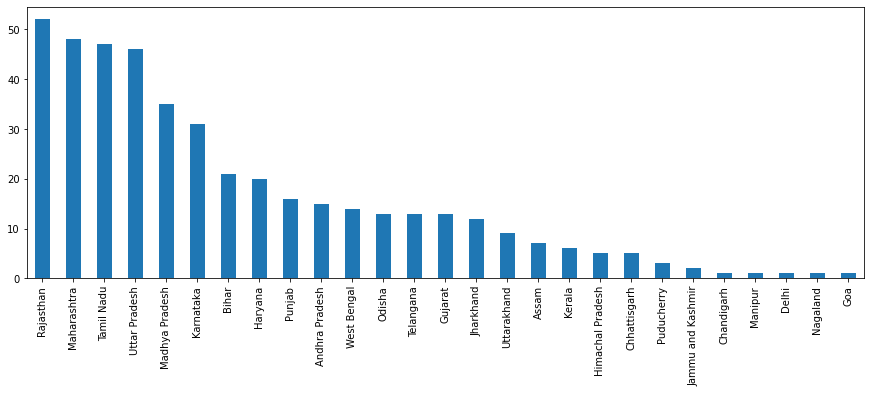

In [106]:
plant_df["State"].value_counts().plot(kind='bar', figsize=(15,5))